<a href="https://colab.research.google.com/github/0Daniii/DVA-Mall-Customersc-Project/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### R Code for Customer Segmentation

The following code performs customer segmentation using hierarchical clustering and K-means. Please ensure you have uploaded your dataset (CSV file) to your Colab environment and update the `file_path` variable in the R code accordingly. `file.choose()` is not supported in this environment.

To upload a file, you can:
1. Click the folder icon on the left sidebar to open the Files pane.
2. Click the 'Upload to session storage' icon (looks like an upward arrow) and select your CSV file.
3. Once uploaded, right-click the file in the Files pane and select 'Copy path'.
4. Paste this path as the value for `file_path` in the R code.

[1] "Cluster Averages:"
  Group.1      Age   Income    Score
1       1 56.33333 54.26667 49.06667
2       2 41.93939 88.93939 16.96970
3       3 32.69231 86.53846 82.12821
4       4 26.68421 57.57895 47.78947
5       5 25.25000 25.83333 76.91667
6       6 45.52381 26.28571 19.38095


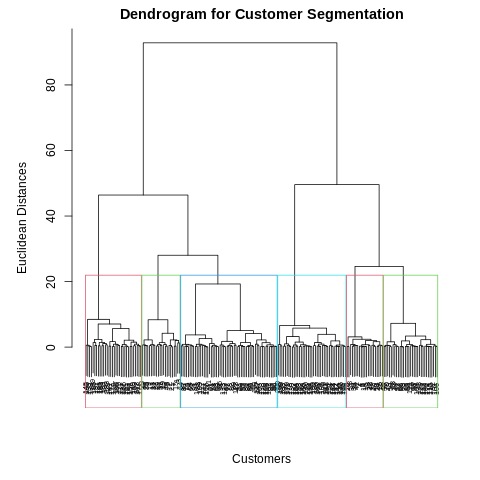

In [10]:
%%R

# Install and load necessary R packages if not already installed
if(!require(plotly)) install.packages("plotly", dependencies = TRUE, quiet=TRUE)
if(!require(factoextra)) install.packages("factoextra", dependencies = TRUE, quiet=TRUE)
library(ggplot2)
library(cluster)
library(plotly)
library(factoextra)

# IMPORTANT: Replace "your_file_name.csv" with the actual path to your uploaded CSV file.
# Example: dataset <- read.csv("/content/your_uploaded_data.csv")
file_path <- "/content/Mall_Customers.csv" # <--- UPDATE THIS LINE WITH YOUR FILE PATH

dataset <- read.csv(file_path)

# Safety Check: Verify data loaded
if(is.null(dataset) || nrow(dataset) == 0){
  stop("Dataset not loaded or is empty. Please ensure the file path is correct and the file contains data.")
}

# Rename columns for clarity
colnames(dataset)[4] <- "Income"
colnames(dataset)[5] <- "Score"

# Select features for clustering: Age (Col 3), Income (Col 4), Score (Col 5)
X <- dataset[, c("Age", "Income", "Score")]

# Scaling is crucial when combining features with different ranges (e.g., Age 0-70 vs Income 15-137)
X_scaled <- scale(X)

# Perform Hierarchical Clustering
dendrogram <- hclust(dist(X_scaled, method = 'euclidean'), method = 'ward.D')
par(mar=c(5,5,2,2))
plot(dendrogram,
     main = "Dendrogram for Customer Segmentation",
     xlab = "Customers", ylab = "Euclidean Distances",
     sub = "", cex = 0.6)
rect.hclust(dendrogram, k = 6, border = 2:5)

# Determine optimal number of clusters using Silhouette Analysis for K-means
fviz_nbclust(X_scaled, kmeans, method = "silhouette") +
  ggtitle("Silhouette Analysis for Optimal K")

# Perform K-means clustering
set.seed(123) # For reproducibility
kmeans_model <- kmeans(X_scaled, centers = 6, nstart = 25)

# Add cluster assignments to the original dataset
dataset$Cluster <- as.factor(kmeans_model$cluster)

# Print cluster averages to understand segment characteristics
print("Cluster Averages:")
print(aggregate(dataset[, c("Age", "Income", "Score")], list(dataset$Cluster), mean))

# Create an interactive 3D scatter plot of customer segments
plot_ly(dataset, x = ~Age, y = ~Income, z = ~Score,
 color = ~Cluster, colors = c('#BF382A', '#0C4B8E', '#2ca02c', '#d62728', '#9467bd', '#8c564b')) %>%
  add_markers(size = 5) %>%
  layout(scene = list(xaxis = list(title = 'Age'),
                      yaxis = list(title = 'Income'),
                        zaxis = list(title = 'Score')),
         title = "3D Customer Segments")


### 3D Interactive Customer Segments Plot

This interactive 3D scatter plot visualizes the customer segments based on Age, Income, and Spending Score. Each color represents a different cluster identified by the K-means algorithm.

In [13]:
%%R

# Ensure dataset and kmeans_model are available from previous cells if this cell is run independently
# If you run this cell after re-executing previous cells, these variables should already be in scope.

# Create an interactive 3D scatter plot of customer segments
plot_ly(dataset, x = ~Age, y = ~Income, z = ~Score,
 color = ~Cluster, colors = c('#BF382A', '#0C4B8E', '#2ca02c', '#d62728', '#9467bd', '#8c564b')) %>%
  add_markers(size = 5) %>%
  layout(scene = list(xaxis = list(title = 'Age'),
                      yaxis = list(title = 'Income'),
                        zaxis = list(title = 'Score')),
         title = "3D Customer Segments")

### Note on Interactive R Plot Rendering in Google Colab

While this code attempts to generate an interactive 3D scatter plot using R's `plotly` library, there can sometimes be limitations with how complex interactive R visualizations are rendered directly within the Google Colab environment.

If you are unable to view or interact with the 3D plot as expected in Colab, it might be due to these rendering constraints. For a more robust and fully interactive experience with `plotly` R plots, it is often recommended to execute the code in a local R environment such as RStudio.